In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=[12,23,34,34]
b=[22,21,22,2]
a+b

[12, 23, 34, 34, 22, 21, 22, 2]

In [3]:
try:
    print(a*b)
except TypeError:
    print("a*b has no meaning in python")

a*b has no meaning in python


In [4]:
a=np.array([12,45,3,2,2,1])
b=np.array([34,45,2,1,5,3])
a*b

array([ 408, 2025,    6,    2,   10,    3])

In [5]:
a=np.array([[12,23,3],
           [10,21,6]])

In [6]:
a

array([[12, 23,  3],
       [10, 21,  6]])

In [7]:
a.sum(axis=0)

array([22, 44,  9])

In [8]:
a

array([[12, 23,  3],
       [10, 21,  6]])

In [9]:
a.sum(axis=1)

array([38, 37])

In [10]:
def square(x:np.ndarray)->np.ndarray:
    return np.power(x,2)
    

In [11]:
a=np.array([[12,34,44],
           [90,89,22]
           ]
          )
square(a)

array([[ 144, 1156, 1936],
       [8100, 7921,  484]], dtype=int32)

In [12]:
def leaky_relu(a:np.ndarray)->np.ndarray:
    return np.maximum(0.2*a,a)

In [13]:
leaky_relu(a)

array([[12., 34., 44.],
       [90., 89., 22.]])

In [14]:
# lets write a nested funtion
from typing import Callable
def deriv(func:Callable[[np.ndarray],np.ndarray],
         input_:np.ndarray,
         delta:float=0.001) -> np.ndarray:
    return (func(input_+delta) - func(input_-delta))/(2*delta)

In [15]:
# lets code a chain function 
from typing import List
array_func=Callable[[np.ndarray],np.ndarray]
Chain=List[array_func]
def chain_length_2(chain:Chain,
                  inpu:np.ndarray)->np.ndarray:         
    '''there's gonna be a chain of 2 function '''
    assert len(chain)==2

    f1=chain[0]
    f2=chain[1]
    return f2(f1(inpu))

In [16]:
def sigmoid(x:np.array)->np.ndarray:
    return 1/(1+np.exp(-x))

In [17]:
# lets code the chain rule
def chain_derv_2(chain:Chain,
                input_range:np.ndarray)->np.ndarray:
    assert len(chain)==2  

    assert input_range.ndim==1  #the dimension of the input

    f1=chain[0]
    f2=chain[1]

    #df1/dx
    f1_x=f1(input_range)
    df1dx=deriv(f1,input_range)
    
    #df2/du(df1)
    df2du=deriv(f2,f1(input_range))

    return df1dx*df2du

In [18]:
def plot_chain(ax,
               chain:Chain,
              input_range)->None:
    assert input_range.ndim==1

    output_range=chain_length_2(chain,input_range)
    ax.plot(input_range,output_range)

In [19]:
def plot_chain_deriv(ax,
                  chain:Chain,
                  input_range:np.ndarray)->None:
    
    output_range = chain_derv_2(chain, input_range)
    ax.plot(input_range, output_range)

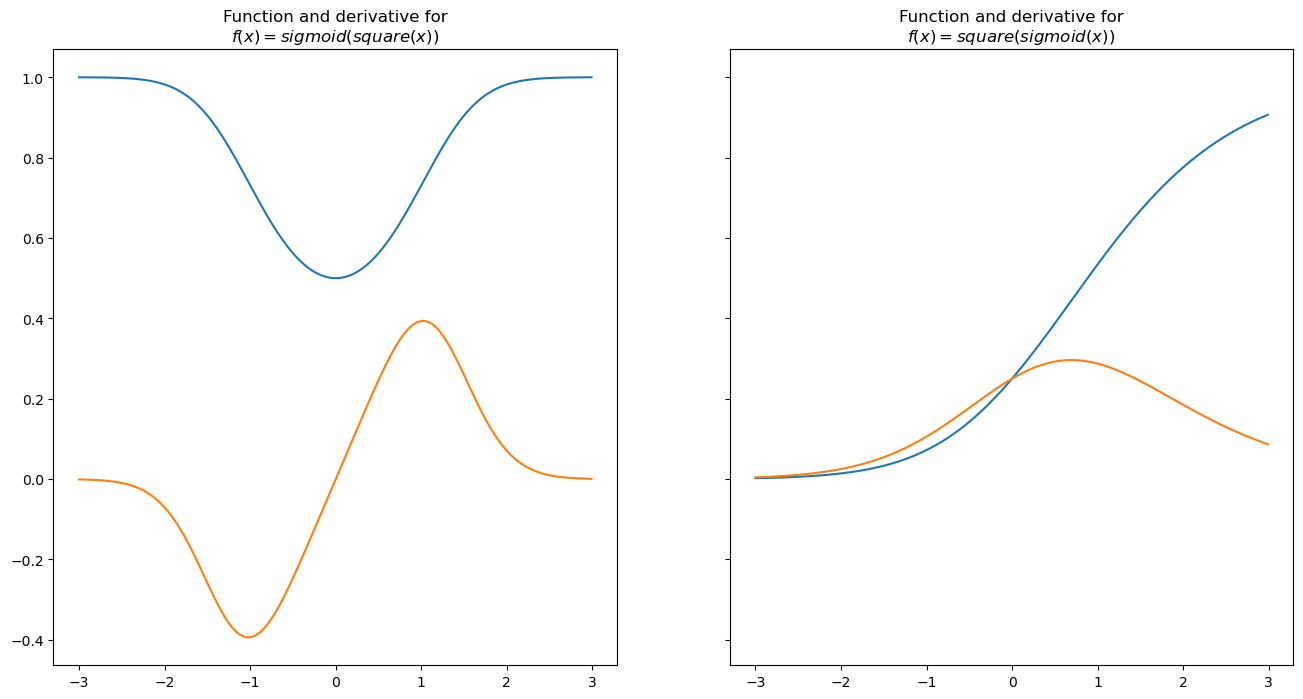

In [20]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1=[square,sigmoid]
chain_2=[sigmoid,square]
plot_range=np.arange(-3,3,0.01)

plot_chain(ax[0],chain_1,plot_range)
plot_chain_deriv(ax[0], chain_1,plot_range)
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, plot_range)
plot_chain_deriv(ax[1], chain_2, plot_range)
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

In [21]:
def chain_derv_3(chain:Chain,
                input_:np.ndarray)-> np.ndarray:
    assert len(chain)==3

    f1=chain[0]
    f2=chain[1]
    f3=chain[2]

    #f(x)
    f1_x=f1(input_)

    #f2 of x
    f2_x=f2(f1_x)
    
    #derivative...back propagation
    df3du=deriv(f3,f2_x)
    #df2 with du
    df2du=deriv(f2,f1_x)
    #df1 with dx
    df1dx=deriv(f1,input_)

    return df1dx*df2du*df3du

In [22]:
def chain_length_3(chain:Chain,
                  x:np.ndarray)->np.ndarray:
    assert len(chain)==3
    f1=chain[0]
    f2=chain[1]
    f3=chain[2]
    return f3(f2(f1(x)))

In [23]:
def plot_chain(ax,
                chain:Chain,
                input_range:np.ndarray,
               length:int=2
              )->None:
    assert input_range.ndim==1
    if length==2:
        output_range=chain_length_2(chain,input_range)
    elif length==3:
        output_range=chain_length_3(chain,input_range)
    ax.plot(input_range,output_range)

In [24]:
def plot_chain_derv(ax,
                   chain:Chain,
                   input_range:np.ndarray,
                   length:int=2)->None:
    if length==2:
        output_range=chain_derv_2(chain,input_range)
    elif length==3:
        output_range=chain_derv_3(chain,input_range)
    ax.plot(input_range,output_range)

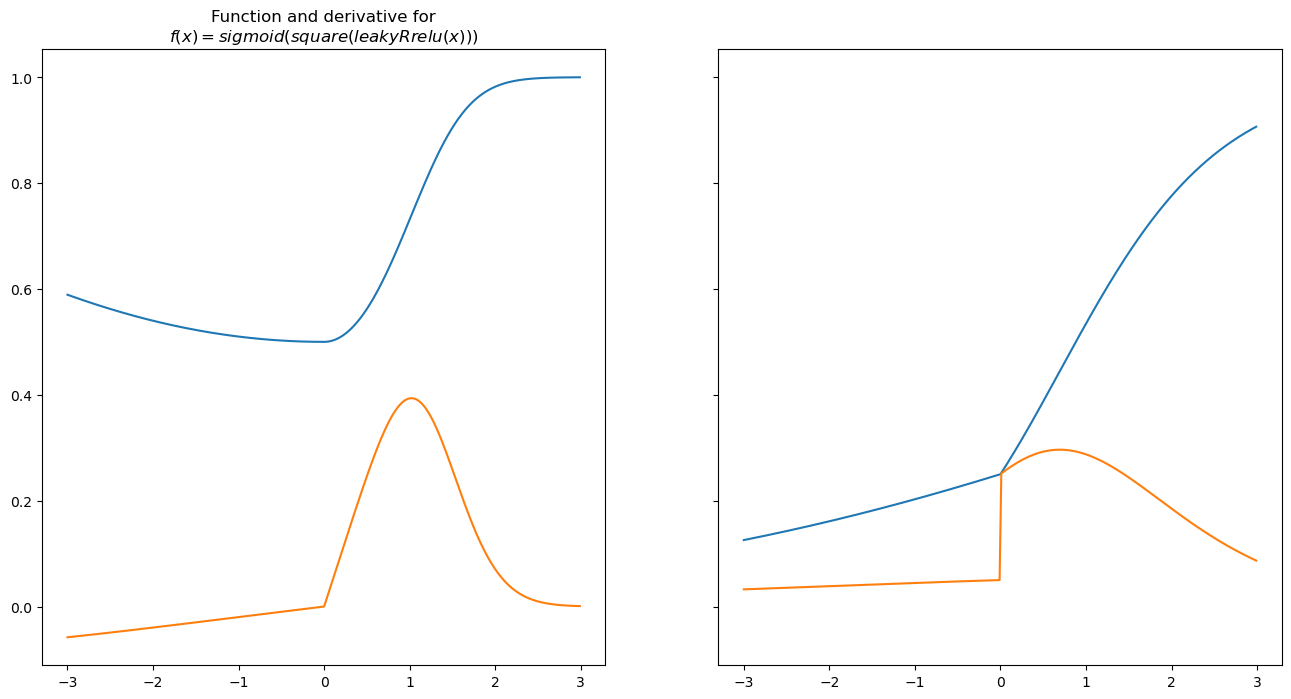

In [25]:
fig,ax=plt.subplots(1,2,sharey=True, figsize=(16, 8))

plot_range=np.arange(-3,3,0.01)
chain_1=[leaky_relu,square,sigmoid]
chain_2=[leaky_relu,sigmoid,square]

plot_chain(ax[0],chain_1,plot_range,length=3)
plot_chain_derv(ax[0],chain_1,plot_range,length=3)
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRrelu(x)))$")

#for the second chain
plot_chain(ax[1], chain_2, plot_range, length=3)
plot_chain_derv(ax[1], chain_2, plot_range, length=3)

In [26]:
# multiple inputs
def multiple_inputs(x:np.ndarray,
                   y:np.ndarray,
                   sigma:array_func)->np.ndarray:
    assert x.shape==y.shape
    a=x+y
    return sigma(a)

In [27]:
# derivatve of simple function with 2 inputs
def multiple_inputs_add_backward(x:np.ndarray,
                                y:np.ndarray,
                                sigma:array_func)->float:
    a=x+y
    #compute the derivative
    dsda=deriv(sigma,a)
    dadx,dady=1,1
    return dsda*dadx,dsda*dady

In [28]:
def matmul_forward(x:np.ndarray,
                  w:np.ndarray)->np.ndarray:
    assert x.shape[1]==w[0]
    format(x.shape[1],w.shape[0])
    n=np.dot(x,w)
    return n

In [29]:
def matmul_backward_first(x:np.ndarray,
                         w:np.ndarray)->np.ndarray:
    #backward pass
    dndx=np.transpose(w,(1,0))
    return dndx

In [30]:
def matrix_forward_extra(x:np.ndarray,
                        w:np.ndarray,
                        sigma:array_func)->np.ndarray:
    assert x.shape[1]==w.shape[0]
    n=np.dot(x,y)
    #feeding our dot product result through sigma
    s=sigma(n)
    return s

In [33]:
def matrix_multiplication_backward_1(x:np.ndarray,
                                    w:np.ndarray,
                                    sigma:array_func)->np.ndarray:
    assert x.shape[1] == w.shape[0]
    n=np.dot(x,w)
    s=sigma(n)
    #lets perform back-propagation
    dsdn=deriv(sigma,n)
    dndx=np.transpose(w,(1,0))
    return np.dot(dsdn,dndx)

In [37]:
# lets test our data
np.random.seed(190203)
x=np.random.randn(1,3)
w=np.random.randn(3,1)

print(x)
print( matmul_backward_first(x,w))

[[ 0.47231121  0.61514271 -1.72622715]]
[[ 0.92819676 -0.60754888 -1.22136052]]


In [38]:
# lets test the other function
print(matrix_multiplication_backward_1(x,w,sigmoid))

[[ 0.08516695 -0.05574581 -0.11206627]]


In [48]:
def matrix_multiplication_forward_sum(x:np.ndarray,
                                     w:np.ndarray,
                                     sigma:array_func)->float:
    assert x.shape[1]==w.shape[0]
    n=np.dot(x,w)
    s=sigma(n)
    sm=np.sum(s)
    return sm

In [49]:
def matrix_function_backward_sum_1(x:np.ndarray,
                                  w:np.ndarray,
                                  sigma:array_func)->np.ndarray:
    
    assert x.shape[1] == w.shape[0]
    n=np.dot(x,w)
    s=sigma(n)
    #lets perform the backpropagation
    dlds=np.ones_like(s)
    dsdn=deriv(sigma,n)
    dldn=dlds*dsdn  # we are not gonna use this for some reason
    dndx=np.transpose(w,(1,0))
    #dldx
    dldx=np.dot(dsdn,dndx)
    return dldx

In [50]:
# lets test our forward and backward functions
np.random.seed(190204)
x=np.random.randn(3,3)
w=np.random.randn(3,2)
print("x:")
print(x)
print("L:")
print(round(matrix_multiplication_forward_sum(x,w,sigmoid),4))
print("DLDX:")
print(matrix_function_backward_sum_1(x,w,sigmoid))

x:
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]
L:
2.3755
DLDX:
[[ 0.2488887  -0.37478057  0.01121962]
 [ 0.12604152 -0.27807404 -0.13945837]
 [ 0.22992798 -0.36623443 -0.02252592]]


In [54]:
X1 = x.copy()
X1[0, 0] += 0.001
print(round(
 (matrix_multiplication_forward_sum(X1, w, sigmoid) - \
 matrix_multiplication_forward_sum(x, w, sigmoid)) / 0.001, 4))


0.2489
